In [ ]:
# muldrow analysis

In [1]:
import geopandas as gpd
import os
import rasterio as rio
from rasterio import plot, mask
import matplotlib.pyplot as plt
import numpy as np
import rioxarray

In [11]:
geo_crop_dir = './import_data/import_sar_asf_script/sar_images_geocoded_cropped'

In [18]:
file_list = []
for file in os.listdir(geo_crop_dir):
    if file != '.ipynb_checkpoints':
        file_list.append(file)

<ipython-input-24-53417d638de2>:4: RuntimeWarning: divide by zero encountered in log
  ax[i].imshow(np.log(sar_image))


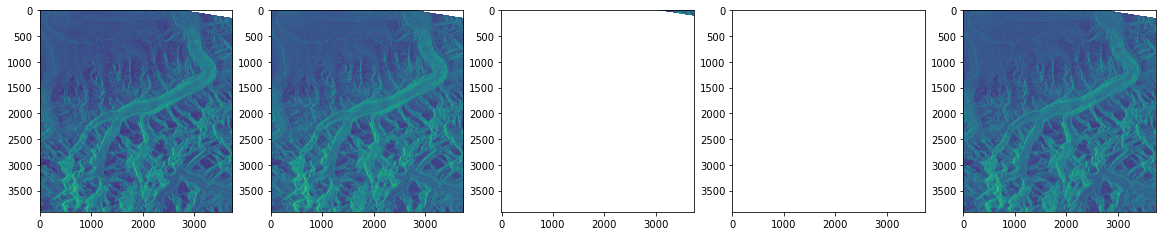

In [24]:
f,ax=plt.subplots(1,len(file_list),figsize=(20,20))
for i,file in enumerate(file_list):
    sar_image = plt.imread(f'{geo_crop_dir}/{file}')
    ax[i].imshow(np.log(sar_image))